In [3]:
import pandas as pd
import numpy as np
import re
import glob
import math
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)

In [2]:
# Since the collider names are too detailed, here we create a dictionary with patterns to classify them into our categories of interest
patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
patterns.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))
patterns.update(dict.fromkeys(['TaskBuilding_2','TaskBuilding_3', 'TaskBuilding_5', 'TaskBuilding_8', 'TaskBuilding_9', 'TaskBuilding_11', 'TaskBuilding_13', 'TaskBuilding_14', 'TaskBuilding_20', 'TaskBuilding_21', 'TaskBuilding_23','TaskBuilding_27', 'TaskBuilding_29', 'TaskBuilding_32', 'TaskBuilding_34',  'TaskBuilding_38', 'TaskBuilding_41', 'TaskBuilding_42', 'TaskBuilding_44', 'TaskBuilding_45', 'TaskBuilding_47', 'TaskBuilding_50', 'TaskBuilding_51', 'TaskBuilding_52', 'BasketballCourt_58', 'Construction_57', 'Graffity_02', 'Graffity_03', 'Graffity_05', 'Graffity_08', 'Graffity_09', 'Graffity_11', 'Graffity_13', 'Graffity_14', 'Graffity_20', 'Graffity_21', 'Graffity_23', 'Graffity_27', 'Graffity_29', 'Graffity_32', 'Graffity_34', 'Graffity_38', 'Graffity_41', 'Graffity_42', 'Graffity_44', 'Graffity_45', 'Graffity_47',  'Graffity_50', 'Graffity_51', 'Graffity_52'], 'TaskBuilding_Public'))
patterns.update(dict.fromkeys(['TaskBuilding_1','TaskBuilding_4', 'TaskBuilding_6', 'TaskBuilding_7', 'TaskBuilding_12', 'TaskBuilding_15', 'TaskBuilding_17', 'TaskBuilding_18', 'TaskBuilding_19', 'TaskBuilding_22', 'TaskBuilding_24','TaskBuilding_25', 'TaskBuilding_26', 'TaskBuilding_28', 'TaskBuilding_30',  'TaskBuilding_31', 'TaskBuilding_33', 'TaskBuilding_35', 'TaskBuilding_36', 'TaskBuilding_37', 'TaskBuilding_39', 'TaskBuilding_40', 'TaskBuilding_43', 'TaskBuilding_48', 'TaskBuilding_54','TaskBuilding_55','Graffity_01','Graffity_04', 'Graffity_06', 'Graffity_07', 'Graffity_12', 'Graffity_15', 'Graffity_17', 'Graffity_18', 'Graffity_19', 'Graffity_22', 'Graffity_24','Graffity_25', 'Graffity_26', 'Graffity_28', 'Graffity_30',  'Graffity_31', 'Graffity_33', 'Graffity_35', 'Graffity_36', 'Graffity_37', 'Graffity_39', 'Graffity_40', 'Graffity_43', 'Graffity_48', 'Graffity_54', 'Graffity_55' ], 'TaskBuilding_Residential'))
default_val = 'Background'

In [3]:
path = "/Volumes/SSD/00_Data_Processing/Pre_processed/05_Debbies_gaze" 

  
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty list to store 
# content
data_frame = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    One_participant = pd.read_csv(filename)
    One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)
    print(filename[-10:-4])
    content.append(One_participant)

# converting content to data frame
data_frame = pd.concat(content)

0479_2
0479_3
0479_5
1754_1
1754_2
1754_3
1754_4
1754_5
2258_1
2258_2
2258_3
2258_4
2258_5
2361_2
2361_3
2361_4
2361_5
2693_1
2693_2
2693_3
2693_4
2693_5
3246_1
3246_2
3246_3
3246_5
3310_1
3310_2
3310_3
3310_4
3310_5
3572_1
3572_2
3572_3
3572_4
3976_1
3976_2
3976_3
3976_4
3976_5
4176_1
4176_2
4176_3
4176_4
4176_5
4796_1
4796_2
4796_3
4796_4
4796_5
4917_1
4917_2
4917_3
4917_4
4917_5
5238_1
5238_2
5238_3
5238_4
5531_1
5531_3
5531_4
5531_5
5741_1
5741_2
5741_3
5741_4
5741_5
6642_1
6642_2
6642_3
6642_4
6642_5
7093_1
7093_2
7093_3
7093_4
7093_5
7264_1
7264_2
7264_3
7264_4
7264_5
7412_1
7412_2
7412_3
7412_4
7412_5
7842_1
7842_2
7842_3
7842_4
7842_5
8007_1
8007_2
8007_3
8007_4
8007_5
8469_1
8469_2
8469_3
8469_4
8469_5
8673_1
8673_2
8673_3
8673_4
8673_5
8695_2
8695_3
8695_4
8695_5
9472_1
9472_2
9472_3
9472_4
9472_5
9502_1
9502_2
9502_3
9502_5
9601_1
9601_2
9601_3
9601_4
9601_5
0479_1
0365_1
0365_2
0365_3
0365_4
0365_5
2361_1
3246_4
4597_1
4597_2
4597_3
4597_4
4597_5
9502_4
9586_1
9586_2
9586_3

In [4]:
data_frame.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [4]:
data_frame = pd.read_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [5]:
Mask_IDs = data_frame['SubjectID'].isin([479, 2361, 3246, 3572, 3976, 5238, 5531, 7264, 8695])
data_frame_final = data_frame.loc[~Mask_IDs]

In [6]:
data_frame_final.head()

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,...,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1
345572,0,0,1754,1,1,1.646740e+09,3,-59.117641,2.431187,34.731068,...,NaN,NaN,NaN,NaN,NaN,NaN,terrain_O.001,Background,NaN,NaN
345573,1,1,1754,1,1,1.646740e+09,3,-59.117641,2.431187,34.731068,...,0.000000,0.000000,2.0,0.131935,28.143798,28.143792,terrain_O.001,Background,NaN,NaN
345574,2,2,1754,1,1,1.646740e+09,3,-59.117641,2.431187,34.731068,...,0.000000,0.000000,NaN,0.131935,28.143798,28.143792,terrain_O.001,Background,NaN,NaN
345575,3,3,1754,1,1,1.646740e+09,3,-59.117641,2.431163,34.731041,...,20.760018,20.760018,NaN,0.131935,28.143823,28.143792,terrain_O.001,Background,NaN,NaN
345576,4,4,1754,1,1,1.646740e+09,3,-59.118603,2.430998,34.731026,...,11.673041,11.673041,NaN,0.131935,28.143742,28.143792,terrain_O.001,Background,NaN,NaN


In [7]:
data_frame_gaze = data_frame_final[data_frame_final.events == -2].copy()

In [8]:
data_frame_gaze.columns

Index(['Unnamed: 0', 'index', 'SubjectID', 'Session', 'SessionSubsection',
       'timeStampDataPointEnd', 'combinedGazeValidityBitmask',
       'eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y',
       'eyePositionCombinedWorld.z', 'eyeDirectionCombinedWorld.y',
       'eyeDirectionCombinedWorld.z', 'eyeDirectionCombinedLocal.x',
       'eyeDirectionCombinedLocal.y', 'eyeDirectionCombinedLocal.z',
       'playerBodyPosition.x', 'playerBodyPosition.y', 'playerBodyPosition.z',
       'hitColliderType', 'hitObjectColliderName', 'ordinalOfHit',
       'hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z',
       'Eucledian_distance', 'Collider_Categorical', 'Face_Hits', 'Time_Shift',
       'Continuous_Time', 'Bitmask_flag', 'Interpolated_collider',
       ' eyePositionCombinedWorld.x', 'Collider_shift', 'counter',
       'Time_of_Gaze', 'Gaze', 'combined_vel', 'thresh', 'isFix',
       'corrected_vel', 'events', 'length', 'distance', 'avg_dist', 'names',
       'Colli

In [9]:
data_frame.combinedGazeValidityBitmask.value_counts(normalize=True)

3    0.941719
0    0.058281
Name: combinedGazeValidityBitmask, dtype: float64

In [10]:
Blinks = pd.DataFrame(data_frame_final.groupby(["SubjectID", "Session"])["combinedGazeValidityBitmask"].value_counts(normalize=True))
Blinks.rename(columns ={"combinedGazeValidityBitmask": "Percentage"}, inplace=True)
Blinks.reset_index(inplace=True)
Blinks.loc[:, 'Validity'] = Blinks['combinedGazeValidityBitmask'].replace( {3:"Valid", 0:"Invalid"})

In [9]:
Blinks.head()

,SubjectID,Session,combinedGazeValidityBitmask,Percentage,Validity
0,365,1,3,0.971096,Valid
1,365,1,0,0.028904,Invalid
2,365,2,3,0.966835,Valid
3,365,2,0,0.033165,Invalid
4,365,3,3,0.970670,Valid


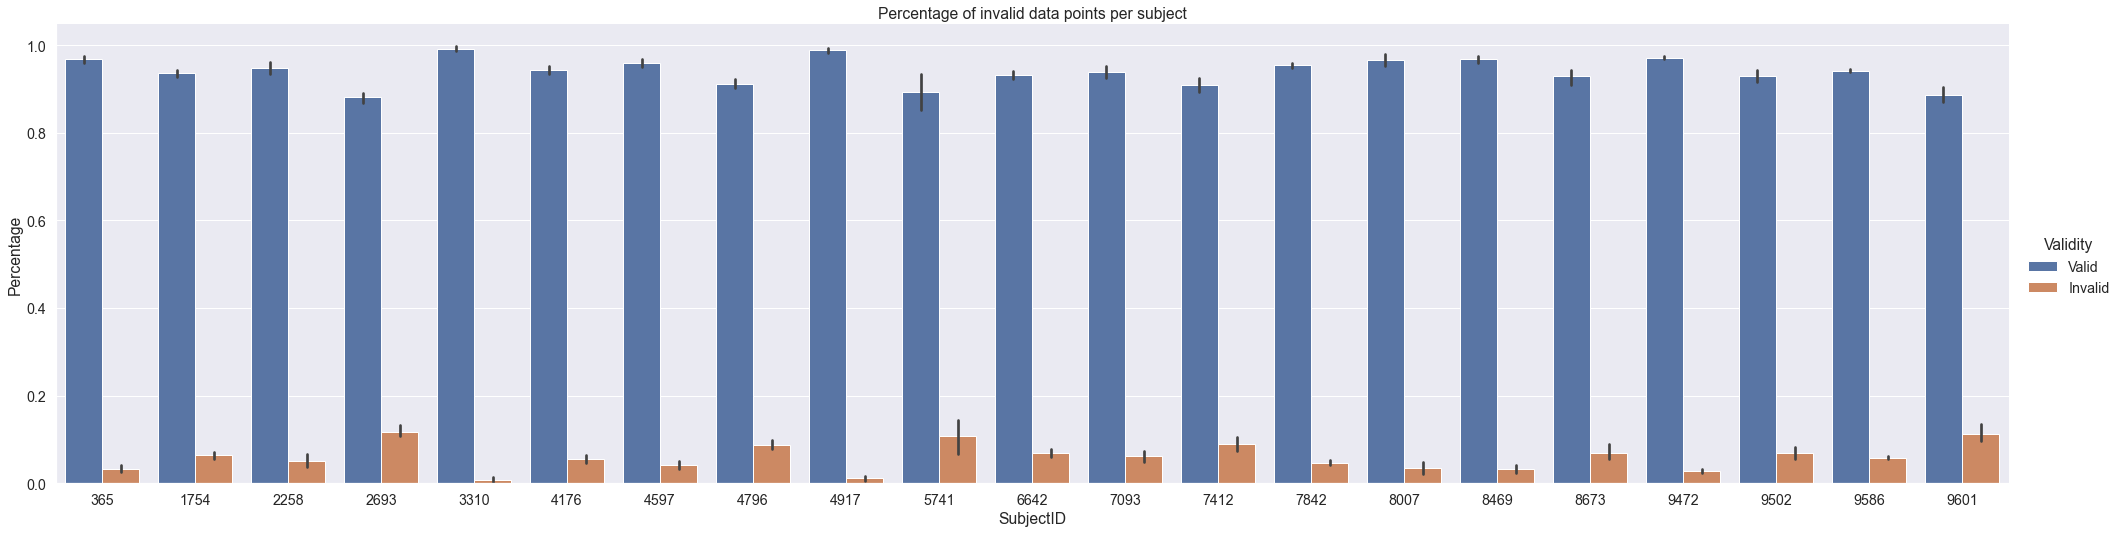

In [11]:
sns.catplot(data=Blinks, hue="Validity", y="Percentage", x="SubjectID", kind="bar", \
            height=7, aspect=4).set(title="Percentage of invalid data points per subject")

In [12]:
data_frame_final.Continuous_Time.describe()

count    1.184310e+07
mean     1.839377e+01
std      1.216912e+01
min      0.000000e+00
25%      7.505000e+00
50%      1.771800e+01
75%      2.775800e+01
max      6.188400e+01
Name: Continuous_Time, dtype: float64

In [13]:
data_frame_gaze["Median_Standard_Duration"] = np.nanmedian(abs(data_frame_gaze.length - np.nanmedian(data_frame_gaze.length))) * 1.4826
data_frame_gaze["gaze_mad_z"] = abs(data_frame_gaze.length.tolist() - np.nanmedian(data_frame_gaze.length)) / data_frame_gaze.Median_Standard_Duration.tolist()
data_frame_gaze["Outlier_Gaze_Length"] = np.where(data_frame_gaze["gaze_mad_z"] > 3.5, "Out", "Stays")
data_frame_gaze_no_out = data_frame_gaze[data_frame_gaze.Outlier_Gaze_Length != "Out"]
data_frame_gaze_no_out.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV_NO_Outliers.cvs")

In [13]:
data_frame_gaze.Outlier_Gaze_Length.value_counts(normalize=True)

Stays    0.952186
Out      0.047814
Name: Outlier_Gaze_Length, dtype: float64

In [14]:
data_frame_gaze.SubjectID.unique()

array([1754, 2258, 2693, 3310, 4176, 4796, 4917, 5741, 6642, 7093, 7412,
       7842, 8007, 8469, 8673, 9472, 9502, 9601,  365, 4597, 9586])

In [15]:
data_frame_gaze.shape

(597227, 51)

In [16]:
data_frame_gaze_no_out.shape

(568671, 51)

In [17]:
data_frame_gaze_no_out.head()

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,...,length,distance,avg_dist,names,Collider_CategoricalN,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length
345582,10,10,1754,1,1,1.646740e+09,0,-59.113197,2.433733,34.732321,...,0.131935,28.143088,28.143792,terrain_O.001,Background,NaN,NaN,0.125037,0.190422,Stays
345593,21,21,1754,1,1,1.646740e+09,3,-59.145714,2.428793,34.728374,...,0.044145,11.127082,11.126827,terrain_O.001,Background,NaN,NaN,0.125037,0.892533,Stays
345597,25,25,1754,1,1,1.646740e+09,3,-59.146008,2.427693,34.731117,...,0.066463,10.024415,10.025828,pavement_O.002,Background,NaN,NaN,0.125037,0.714037,Stays
345608,36,36,1754,1,1,1.646740e+09,3,-59.125034,2.431595,34.727993,...,0.088785,57.616982,57.618986,Fence_34,Background,NaN,NaN,0.125037,0.535517,Stays
345621,49,49,1754,1,1,1.646740e+09,3,-59.083534,2.439589,34.723770,...,0.166656,79.377403,79.373923,Building_160,Building,NaN,NaN,0.125037,0.087266,Stays


In [17]:
data_frame_gaze_no_out_ONLY_TEST = data_frame_gaze_no_out[(data_frame_gaze_no_out.Collider_CategoricalN != "Background") & (data_frame_gaze_no_out.Collider_CategoricalN != "Building")].copy()

In [18]:
data_frame_gaze_no_out_ONLY_TEST.Collider_CategoricalN.unique()

array(['TaskBuilding_Public', 'Passive_Agent', 'TaskBuilding_Residential',
       'Active_Agent', 'Passive_Agent_Face', 'Active_Agent_Face',
       'Global_Landmark'], dtype=object)

In [19]:
data_frame_gaze_no_out_ONLY_TEST.shape

(87732, 51)

In [20]:
data_frame_gaze_no_out.shape

(568671, 51)

In [21]:
patterns1 = {'01_Cma':1}
patterns1.update(dict.fromkeys(['TaskBuilding_14'], 1))
patterns1.update(dict.fromkeys(['02_Cma','TaskBuilding_41','Graffity_41'], 2))
patterns1.update(dict.fromkeys(['03_Cma','TaskBuilding_2', 'Graffity_02'], 3))
patterns1.update(dict.fromkeys(['04_Cma','TaskBuilding_47','Graffity_47'], 4))
patterns1.update(dict.fromkeys(['05_Cma','Construction_57'], 5))
patterns1.update(dict.fromkeys(['06_Cma','TaskBuilding_20','Graffity_20'], 6))
patterns1.update(dict.fromkeys(['07_Cma','TaskBuilding_9','Graffity_9'], 7))
patterns1.update(dict.fromkeys(['08_Cma','TaskBuilding_50','Graffity_50'], 8))
patterns1.update(dict.fromkeys(['09_Cma','TaskBuilding_45','Graffity_45'], 9))
patterns1.update(dict.fromkeys(['10_Cma','TaskBuilding_8','Graffity_10'], 10))
patterns1.update(dict.fromkeys(['11_Cma','TaskBuilding_27','Graffity_27'], 11))
patterns1.update(dict.fromkeys(['12_Cma','TaskBuilding_51','Graffity_51'], 12))
patterns1.update(dict.fromkeys(['13_Cma','TaskBuilding_3','Graffity_03'], 13))
patterns1.update(dict.fromkeys(['14_Cma','TaskBuilding_11','Graffity_11'], 14))
patterns1.update(dict.fromkeys(['15_Cma','TaskBuilding_42','Graffity_42'], 15))
patterns1.update(dict.fromkeys(['16_Cma','TaskBuilding_23','Graffity_23'], 16))
patterns1.update(dict.fromkeys(['17_Cma','TaskBuilding_52','Graffity_52'], 17))
patterns1.update(dict.fromkeys(['18_Cma','TaskBuilding_38','Graffity_38'], 18))
patterns1.update(dict.fromkeys(['19_Cma','TaskBuilding_34','Graffity_34'], 19))
patterns1.update(dict.fromkeys(['20_Cma','BasketballCourt_58'], 20))
patterns1.update(dict.fromkeys(['21_Cma','TaskBuilding_5','Graffity_05'], 21))
patterns1.update(dict.fromkeys(['22_Cma','TaskBuilding_29','Graffity_29'], 22))
patterns1.update(dict.fromkeys(['23_Cma','TaskBuilding_32','Graffity_32'], 23))
patterns1.update(dict.fromkeys(['24_Cma','TaskBuilding_13','Graffity_13'], 24))
patterns1.update(dict.fromkeys(['25_Cma','TaskBuilding_44','Graffity_44'], 25))
patterns1.update(dict.fromkeys(['26_Cma','TaskBuilding_21','Graffity_21'], 26))
patterns1.update(dict.fromkeys(['27_Cma','Crane_59', 'Castle-TaskBuilding_56'], 27))
patterns1.update(dict.fromkeys(['28_Cma','Church-TaskBuilding_16'], 28))
patterns1.update(dict.fromkeys(['29_Sa','TaskBuilding_4','Graffity_59'], 29))
patterns1.update(dict.fromkeys(['30_Sa','TaskBuilding_1','Graffity_30'], 30))
patterns1.update(dict.fromkeys(['31_Sa','TaskBuilding_6','Graffity_31'], 31))
patterns1.update(dict.fromkeys(['32_Sa','TaskBuilding_7','Graffity_32'], 32))
patterns1.update(dict.fromkeys(['33_Sa','TaskBuilding_17','Graffity_33'], 33))
patterns1.update(dict.fromkeys(['34_Sa','TaskBuilding_15','Graffity_15'], 34))
patterns1.update(dict.fromkeys(['35_Sa','TaskBuilding_12','Graffity_12'], 35))
patterns1.update(dict.fromkeys(['36_Sa','TaskBuilding_18','Graffity_18'], 36))
patterns1.update(dict.fromkeys(['37_Sa','TaskBuilding_19','Graffity_19'], 37))
patterns1.update(dict.fromkeys(['38_Sa','TaskBuilding_22','Graffity_22'], 38))
patterns1.update(dict.fromkeys(['39_Sa','TaskBuilding_24','Graffity_24'], 39))
patterns1.update(dict.fromkeys(['40_Sa','TaskBuilding_25','Graffity_25'], 40))
patterns1.update(dict.fromkeys(['41_Sa','TaskBuilding_26','Graffity_26'], 41))
patterns1.update(dict.fromkeys(['42_Sa','TaskBuilding_28','Graffity_28'], 42))
patterns1.update(dict.fromkeys(['43_Sa','TaskBuilding_30','Graffity_30'], 43))
patterns1.update(dict.fromkeys(['44_Sa','TaskBuilding_31','Graffity_31'], 44))
patterns1.update(dict.fromkeys(['45_Sa','TaskBuilding_33','Graffity_33'], 45))
patterns1.update(dict.fromkeys(['46_Sa','TaskBuilding_35','Graffity_35'], 46))
patterns1.update(dict.fromkeys(['47_Sa','TaskBuilding_36','Graffity_36'], 47))
patterns1.update(dict.fromkeys(['48_Sa','TaskBuilding_37','Graffity_37'], 48))
patterns1.update(dict.fromkeys(['49_Sa','TaskBuilding_39','Graffity_39'], 49))
patterns1.update(dict.fromkeys(['50_Sa','TaskBuilding_40','Graffity_40'], 50))
patterns1.update(dict.fromkeys(['51_Sa','TaskBuilding_43','Graffity_43'], 51))
patterns1.update(dict.fromkeys(['52_Sa','TaskBuilding_48','Graffity_48'], 52))
patterns1.update(dict.fromkeys(['53_Sa','TaskBuilding_54','Graffity_54'], 53))
patterns1.update(dict.fromkeys(['54_Sa','TaskBuilding_55','Graffity_55'], 54))
patterns1.update(dict.fromkeys(['55_Sa','Windmill-TaskBuilding_10_1'], 55))
patterns1.update(dict.fromkeys(['56_Sa','HighSilo-TaskBuilding_49'], 56))
default_val = np.nan

In [22]:
data_frame_gaze_no_out_ONLY_TEST.columns

Index(['Unnamed: 0', 'index', 'SubjectID', 'Session', 'SessionSubsection',
       'timeStampDataPointEnd', 'combinedGazeValidityBitmask',
       'eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y',
       'eyePositionCombinedWorld.z', 'eyeDirectionCombinedWorld.y',
       'eyeDirectionCombinedWorld.z', 'eyeDirectionCombinedLocal.x',
       'eyeDirectionCombinedLocal.y', 'eyeDirectionCombinedLocal.z',
       'playerBodyPosition.x', 'playerBodyPosition.y', 'playerBodyPosition.z',
       'hitColliderType', 'hitObjectColliderName', 'ordinalOfHit',
       'hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z',
       'Eucledian_distance', 'Collider_Categorical', 'Face_Hits', 'Time_Shift',
       'Continuous_Time', 'Bitmask_flag', 'Interpolated_collider',
       ' eyePositionCombinedWorld.x', 'Collider_shift', 'counter',
       'Time_of_Gaze', 'Gaze', 'combined_vel', 'thresh', 'isFix',
       'corrected_vel', 'events', 'length', 'distance', 'avg_dist', 'names',
       'Colli

In [23]:
data_frame_gaze_no_out_ONLY_TEST['avatarID'] = data_frame_gaze_no_out_ONLY_TEST['names'].apply(lambda x: next((val for key, val in patterns1.items() if key == x), default_val))

In [24]:
patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', '^Graffity':'Graffity'}
patterns2.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))

In [25]:
data_frame_gaze_no_out_ONLY_TEST["Hit_Object_Category"] =  data_frame_gaze_no_out_ONLY_TEST['names'].apply(lambda x: next((val for key, val in patterns2.items() if re.match(key, x)), default_val))

In [26]:
data_frame_gaze_no_out_ONLY_TEST.head()

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,...,avg_dist,names,Collider_CategoricalN,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,avatarID,Hit_Object_Category
345657,85,85,1754,1,1,1.646740e+09,3,-59.155067,2.438028,34.710476,...,10.490199,TaskBuilding_35,TaskBuilding_Public,NaN,NaN,0.125037,0.269760,Stays,46.0,Building
345663,91,91,1754,1,1,1.646740e+09,3,-59.153923,2.436220,34.710114,...,7.306403,46_Sa,Passive_Agent,NaN,NaN,0.125037,0.710064,Stays,46.0,Agent
345683,111,111,1754,1,1,1.646740e+09,3,-59.141640,2.439878,34.705273,...,11.949969,TaskBuilding_35,TaskBuilding_Public,NaN,NaN,0.125037,1.150375,Stays,46.0,Building
345698,126,126,1754,1,1,1.646740e+09,3,-59.134239,2.449852,34.697357,...,12.341319,Graffity_35,TaskBuilding_Residential,NaN,NaN,0.125037,0.091247,Stays,46.0,Graffity
345721,149,149,1754,1,1,1.646740e+09,0,-59.157295,2.454208,34.688549,...,12.498443,Graffity_35,TaskBuilding_Residential,NaN,NaN,0.125037,1.503423,Stays,46.0,Graffity


In [27]:
data_frame_gaze_no_out_ONLY_TEST.head(30)

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,...,avg_dist,names,Collider_CategoricalN,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,avatarID,Hit_Object_Category
345657,85,85,1754,1,1,1.646740e+09,3,-59.155067,2.438028,34.710476,...,10.490199,TaskBuilding_35,TaskBuilding_Public,NaN,NaN,0.125037,0.269760,Stays,46.0,Building
345663,91,91,1754,1,1,1.646740e+09,3,-59.153923,2.436220,34.710114,...,7.306403,46_Sa,Passive_Agent,NaN,NaN,0.125037,0.710064,Stays,46.0,Agent
345683,111,111,1754,1,1,1.646740e+09,3,-59.141640,2.439878,34.705273,...,11.949969,TaskBuilding_35,TaskBuilding_Public,NaN,NaN,0.125037,1.150375,Stays,46.0,Building
345698,126,126,1754,1,1,1.646740e+09,3,-59.134239,2.449852,34.697357,...,12.341319,Graffity_35,TaskBuilding_Residential,NaN,NaN,0.125037,0.091247,Stays,46.0,Graffity
345721,149,149,1754,1,1,1.646740e+09,0,-59.157295,2.454208,34.688549,...,12.498443,Graffity_35,TaskBuilding_Residential,NaN,NaN,0.125037,1.503423,Stays,46.0,Graffity
345867,295,295,1754,1,1,1.646740e+09,3,-59.036499,2.431438,34.655209,...,125.403677,TaskBuilding_27,TaskBuilding_Public,NaN,NaN,0.125037,2.423726,Stays,11.0,Building
346879,1307,1307,1754,1,1,1.646740e+09,3,-30.053852,2.310997,48.434856,...,96.833211,TaskBuilding_27,TaskBuilding_Public,NaN,NaN,0.125037,0.440325,Stays,11.0,Building
346885,1313,1313,1754,1,1,1.646740e+09,3,-29.846848,2.300171,48.240524,...,97.588068,TaskBuilding_27,TaskBuilding_Public,NaN,NaN,0.125037,0.880636,Stays,11.0,Building
346927,1355,1355,1754,1,1,1.646740e+09,3,-26.636272,2.226268,48.372143,...,98.996334,TaskBuilding_27,TaskBuilding_Public,NaN,NaN,0.125037,0.007926,Stays,11.0,Building
346998,1426,1426,1754,1,1,1.646740e+09,3,-22.417034,2.218451,50.044300,...,60.791197,43_Sa,Passive_Agent,NaN,NaN,0.125037,0.126942,Stays,43.0,Agent


In [28]:
data_frame_gaze_no_out_ONLY_TEST.groupby([ "Hit_Object_Category", "Session"])["length"].agg(['median','count','mean','std','max', 'min'])

median  count      mean       std       max  \
Hit_Object_Category Session                                                  
Agent               1        0.170295   3579  0.208839  0.138466  0.592720   
                    2        0.174841   2722  0.206790  0.138640  0.592324   
                    3        0.188478   1979  0.219317  0.141805  0.589743   
                    4        0.177570   2013  0.213261  0.138000  0.590736   
                    5        0.166162   1935  0.202932  0.138659  0.592229   
Building            1        0.155246  11663  0.186866  0.127171  0.592720   
                    2        0.155744  10681  0.189318  0.126567  0.591730   
                    3        0.155744   9898  0.190425  0.128422  0.592746   
                    4        0.156124   9744  0.190981  0.127296  0.593217   
                    5        0.155744  10153  0.188981  0.127787  0.592228   
Global_Landmark     1        0.166675   1916  0.203471  0.134078  0.592720   
                    2        0.166657   1525  0.200312  0.135248  0.592724   
                    3        0.171120   1745  0.201333  0.130115  0.591232   
                    4        0.177567   1501  0.205967  0.134085  0.591726   
                    5        0.166656   1298  0.196606  0.132076  0.589248   
Graffity            1        0.188480   3140  0.217310  0.139508  0.593215   
                    2        0.188482   3140  0.217858  0.139696  0.590738   
                    3        0.179061   2738  0.209895  0.136568  0.592720   
                    4        0.187984   2502  0.218470  0.139396  0.590736   
                    5        0.187490   2457  0.215014  0.136322  0.593216   

                                  min  
Hit_Object_Category Session            
Agent               1        0.032736  
                    2        0.032240  
                    3        0.011407  
                    4        0.032239  
                    5        0.026783  
Building            1        0.010912  
                    2        0.009919  
                    3        0.010417  
                    4        0.011408  
                    5        0.011903  
Global_Landmark     1        0.011408  
                    2        0.010912  
                    3        0.011904  
                    4        0.011407  
                    5        0.010911  
Graffity            1        0.031744  
                    2        0.021824  
                    3        0.033231  
                    4        0.032737  
                    5        0.032737

In [58]:
summary_name_stats_fix_length_NS_Agent.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/summary_name_stats_fix_length_NS_Agent.csv")

In [29]:
summary_name_stats_fix_length_NS = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID", "avatarID", "Hit_Object_Category", "Collider_CategoricalN","Session" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [30]:
summary_name_stats_fix_length_NS.reset_index(inplace=True)

In [31]:
summary_name_stats_fix_length_NS

,SubjectID,avatarID,Hit_Object_Category,Collider_CategoricalN,Session,count,mean,median,std,max,min
0,365,1.0,Agent,Active_Agent,1,1,0.376960,0.376960,NaN,0.376960,0.376960
1,365,1.0,Agent,Active_Agent,2,1,0.168639,0.168639,NaN,0.168639,0.168639
2,365,1.0,Agent,Active_Agent,3,3,0.151281,0.155249,0.027988,0.177073,0.121521
3,365,1.0,Building,TaskBuilding_Public,1,12,0.161862,0.144089,0.104672,0.310993,0.033232
4,365,1.0,Building,TaskBuilding_Public,2,12,0.203815,0.204600,0.097208,0.355136,0.066960
...,...,...,...,...,...,...,...,...,...,...,...
10130,9601,56.0,Global_Landmark,Global_Landmark,1,33,0.216103,0.198897,0.137962,0.563456,0.044145
10131,9601,56.0,Global_Landmark,Global_Landmark,2,40,0.220620,0.188231,0.153987,0.576847,0.022320
10132,9601,56.0,Global_Landmark,Global_Landmark,3,38,0.218175,0.193689,0.131404,0.554530,0.044641
10133,9601,56.0,Global_Landmark,Global_Landmark,4,47,0.214629,0.178065,0.123525,0.533092,0.044135


In [32]:
summary_name_stats_fix_length_NS_Agent = summary_name_stats_fix_length_NS[summary_name_stats_fix_length_NS.Hit_Object_Category == 'Agent'].copy()
summary_name_stats_fix_length_NS_Agent['Agent_Category'] = summary_name_stats_fix_length_NS_Agent['Collider_CategoricalN'].str.contains('Active')
summary_name_stats_fix_length_NS_Agent.loc[:, 'Agent_Category'] = summary_name_stats_fix_length_NS_Agent['Agent_Category'].replace({True: 'Active', False: 'Passive'})

In [55]:
summary_name_stats_fix_length_NS_Agent

,SubjectID,avatarID,Hit_Object_Category,Collider_CategoricalN,Session,count,mean,median,std,max,min,Agent_Category
0,365,1.0,Agent,Active_Agent,1,1,0.376960,0.376960,NaN,0.376960,0.376960,Active
1,365,1.0,Agent,Active_Agent,2,1,0.168639,0.168639,NaN,0.168639,0.168639,Active
2,365,1.0,Agent,Active_Agent,3,3,0.151281,0.155249,0.027988,0.177073,0.121521,Active
8,365,2.0,Agent,Active_Agent,1,2,0.197160,0.197160,0.144148,0.299088,0.095232,Active
9,365,2.0,Agent,Active_Agent,3,4,0.295367,0.291152,0.185830,0.511870,0.087296,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
10108,9601,53.0,Agent,Passive_Agent,4,2,0.188193,0.188193,0.127988,0.278695,0.097692,Passive
10115,9601,54.0,Agent,Passive_Agent,2,1,0.122015,0.122015,NaN,0.122015,0.122015,Passive
10116,9601,54.0,Agent,Passive_Agent,5,1,0.266351,0.266351,NaN,0.266351,0.266351,Passive
10123,9601,55.0,Agent,Passive_Agent,1,1,0.056047,0.056047,NaN,0.056047,0.056047,Passive


In [ ]:
Complete = pd.merge(HumanA, summary_name_stats_fix_length_NS,
                                 left_on= ['ID','avatarID'],
                                 right_on=['SubjectID','avatarID'],
                   how="right")

In [ ]:
Complete.tail(50)

In [ ]:
Complete.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Gaze_data_long.csv")

In [ ]:
Complete.shape

In [ ]:
HumanA.shape

In [ ]:
summary_name_stats_fix_length_NS.names.unique()

In [ ]:
summary_name_stats_fix_length.shape

In [33]:
summary_stats_fix_length = pd.DataFrame(data_frame_gaze_no_out.groupby(["Collider_CategoricalN", "SubjectID", "Session"])["length"].agg(['count','mean','median','std','max', 'min']))
summary_stats_fix_length.reset_index(inplace=True)

In [34]:
summary_name_stats_fix_length_BIG= pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID", "Hit_Object_Category", "Collider_CategoricalN","Session" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [35]:
summary_name_stats_fix_length_BIG.reset_index(inplace=True)
summary_name_stats_fix_length_BIG.head(20)

,SubjectID,Hit_Object_Category,Collider_CategoricalN,Session,count,mean,median,std,max,min
0,365,Agent,Active_Agent,1,26,0.199373,0.135159,0.144091,0.506912,0.044144
1,365,Agent,Active_Agent,2,16,0.244293,0.184263,0.173658,0.543616,0.044641
2,365,Agent,Active_Agent,3,32,0.240668,0.201624,0.131056,0.511870,0.044142
3,365,Agent,Active_Agent,4,24,0.209626,0.178064,0.138055,0.590736,0.044144
4,365,Agent,Active_Agent,5,14,0.209206,0.165912,0.142917,0.489056,0.044641
5,365,Agent,Active_Agent_Face,2,1,0.130944,0.130944,NaN,0.130944,0.130944
6,365,Agent,Active_Agent_Face,3,7,0.272799,0.195424,0.194154,0.555024,0.088287
7,365,Agent,Active_Agent_Face,4,3,0.116064,0.121521,0.009884,0.122017,0.104655
8,365,Agent,Active_Agent_Face,5,2,0.194184,0.194184,0.196055,0.332816,0.055552
9,365,Agent,Passive_Agent,1,26,0.221846,0.221712,0.131449,0.510877,0.041663


In [ ]:
summary_name_stats_fix_length_BIG.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Grouped_Gazes.cvs")

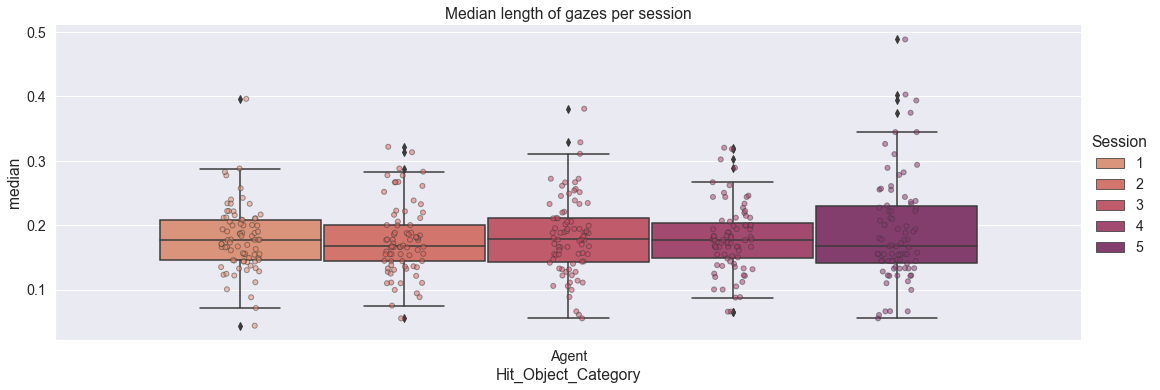

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Hit_Object_Category", y="median", hue="Session", data=summary_name_stats_fix_length_BIG[(summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent")], \
            height=5, aspect=3, kind='box').set(title="Median length of gazes per session")
ax = sns.stripplot(x="Hit_Object_Category", y="median", hue="Session", data=summary_name_stats_fix_length_BIG[summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent"], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/counts.png',  bbox_inches='tight')

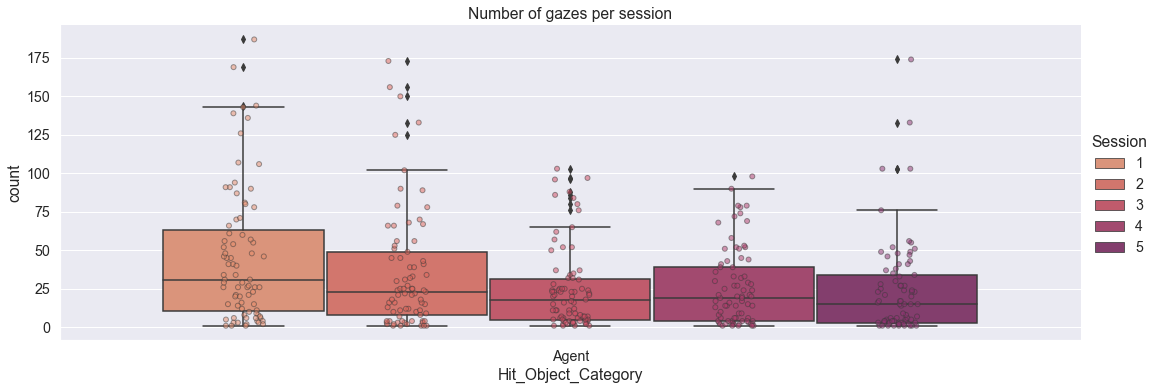

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Hit_Object_Category", y="count", hue="Session", data=summary_name_stats_fix_length_BIG[(summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Hit_Object_Category", y="count", hue="Session", data=summary_name_stats_fix_length_BIG[summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent"], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/counts.png',  bbox_inches='tight')

In [ ]:
dy='Hit_Object_Category'; dx='count'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(18, 15))

import ptitprince as pt

ax=pt.half_violinplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
            saturation = 1, orient = ort) 

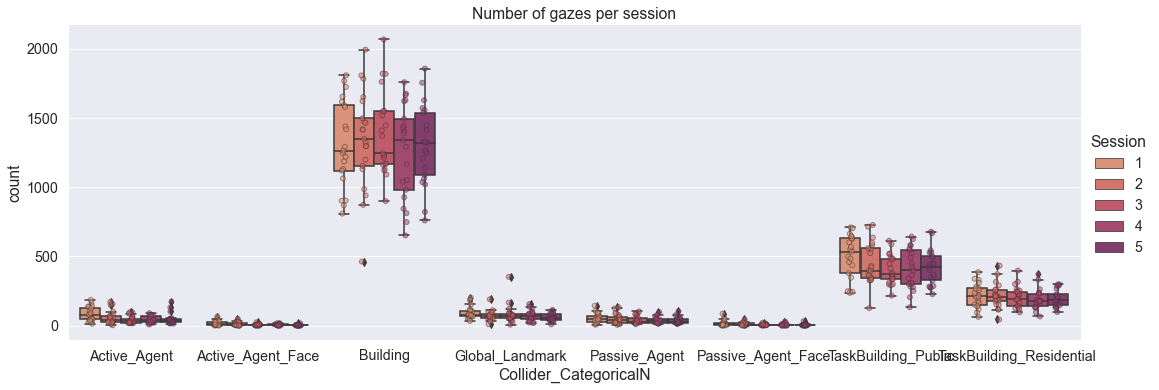

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png')

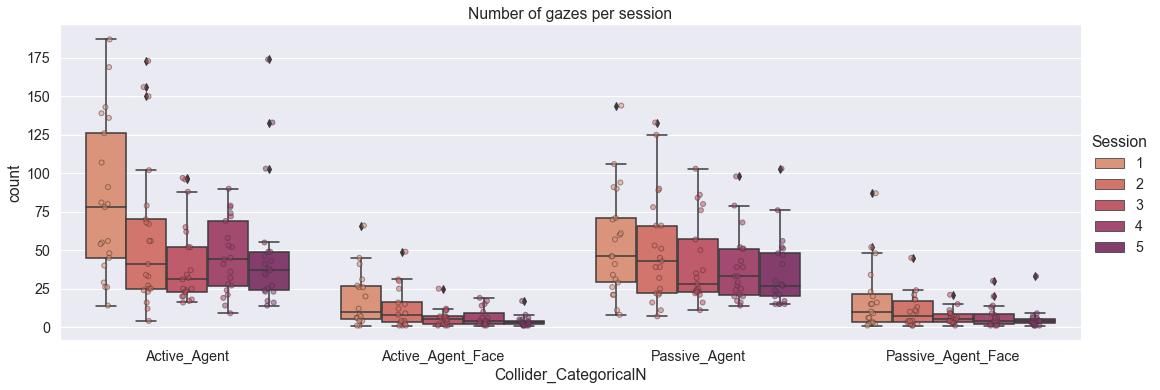

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=100)
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count_Faces.png',  bbox_inches='tight')

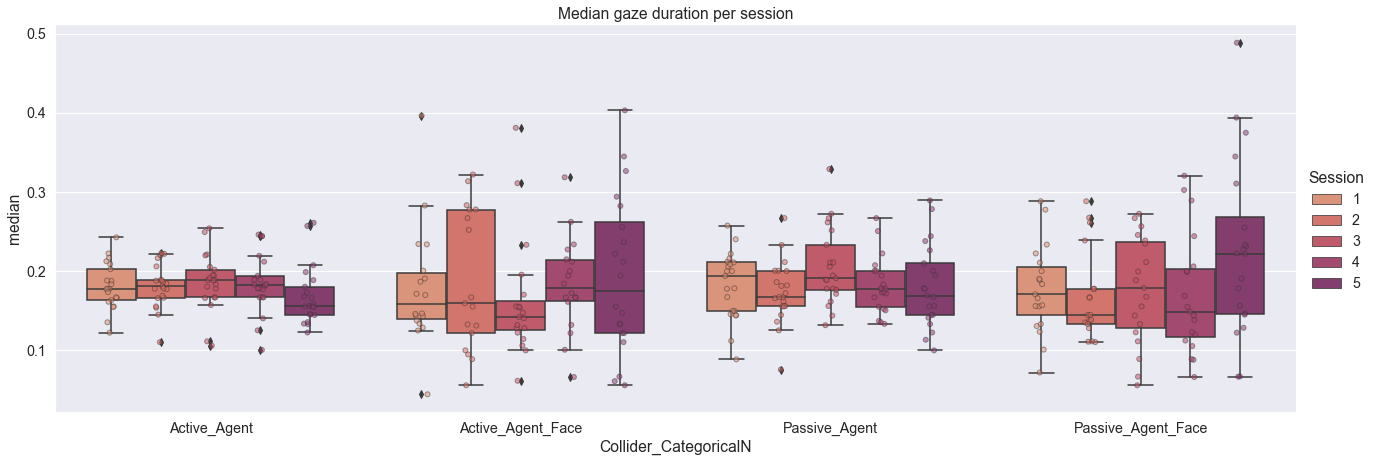

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration_Faces.png',  bbox_inches='tight')

In [56]:
data_frame_gaze_no_out_ONLY_TEST.tail()

,Unnamed: 0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,...,avg_dist,names,Collider_CategoricalN,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,avatarID,Hit_Object_Category
15815377,108981,108981,9586,5,3,1.655289e+09,3,79.019798,-4.896025,-229.422073,...,29.525342,TaskBuilding_25,TaskBuilding_Public,NaN,NaN,0.125037,0.682267,Stays,40.0,Building
15819614,113218,113218,9586,5,3,1.655289e+09,3,113.661552,-3.946193,-167.269531,...,114.957759,BasketballCourt_58,TaskBuilding_Public,NaN,NaN,0.125037,1.447856,Stays,20.0,NaN
15819952,113556,113556,9586,5,3,1.655289e+09,3,110.496048,-3.516545,-150.648438,...,100.384884,TaskBuilding_28,TaskBuilding_Public,NaN,NaN,0.125037,0.214189,Stays,42.0,Building
15820798,114402,114402,9586,5,3,1.655289e+09,3,98.682976,-2.491314,-115.873283,...,517.734566,HighSilo-TaskBuilding_49,Global_Landmark,NaN,NaN,0.125037,3.459006,Stays,56.0,Global_Landmark
15820974,114578,114578,9586,5,3,1.655289e+09,3,95.453751,-2.381682,-111.614273,...,47.386218,TaskBuilding_4,TaskBuilding_Residential,NaN,NaN,0.125037,1.951634,Stays,29.0,Building


In [57]:
data_frame_gaze_no_out_ONLY_TEST.columns

Index(['Unnamed: 0', 'index', 'SubjectID', 'Session', 'SessionSubsection',
       'timeStampDataPointEnd', 'combinedGazeValidityBitmask',
       'eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y',
       'eyePositionCombinedWorld.z', 'eyeDirectionCombinedWorld.y',
       'eyeDirectionCombinedWorld.z', 'eyeDirectionCombinedLocal.x',
       'eyeDirectionCombinedLocal.y', 'eyeDirectionCombinedLocal.z',
       'playerBodyPosition.x', 'playerBodyPosition.y', 'playerBodyPosition.z',
       'hitColliderType', 'hitObjectColliderName', 'ordinalOfHit',
       'hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z',
       'Eucledian_distance', 'Collider_Categorical', 'Face_Hits', 'Time_Shift',
       'Continuous_Time', 'Bitmask_flag', 'Interpolated_collider',
       ' eyePositionCombinedWorld.x', 'Collider_shift', 'counter',
       'Time_of_Gaze', 'Gaze', 'combined_vel', 'thresh', 'isFix',
       'corrected_vel', 'events', 'length', 'distance', 'avg_dist', 'names',
       'Colli

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID", "SessionSubsection"])['']

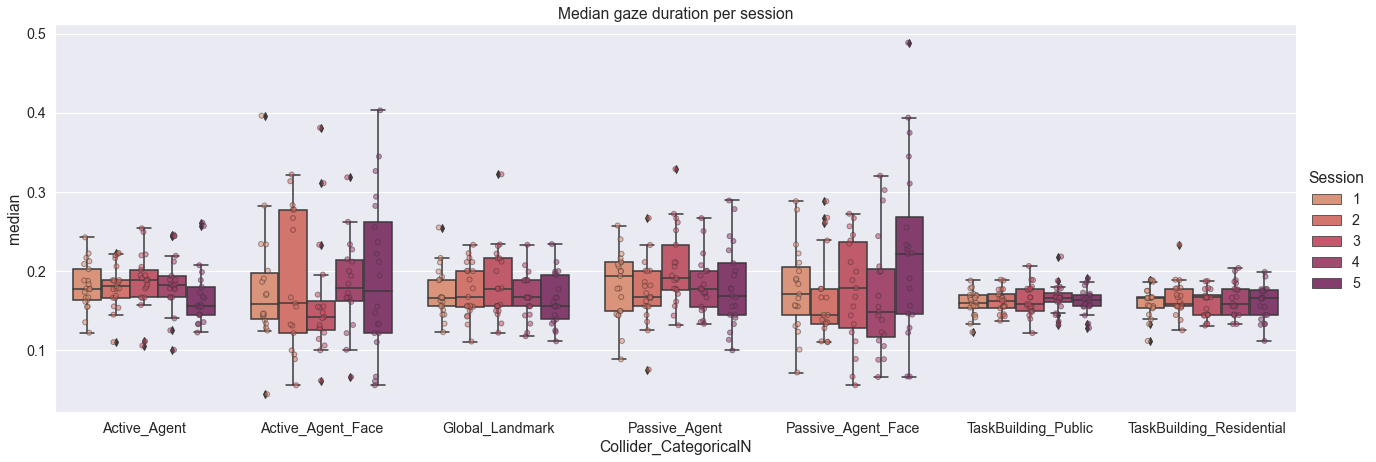

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration_All.png',  bbox_inches='tight')

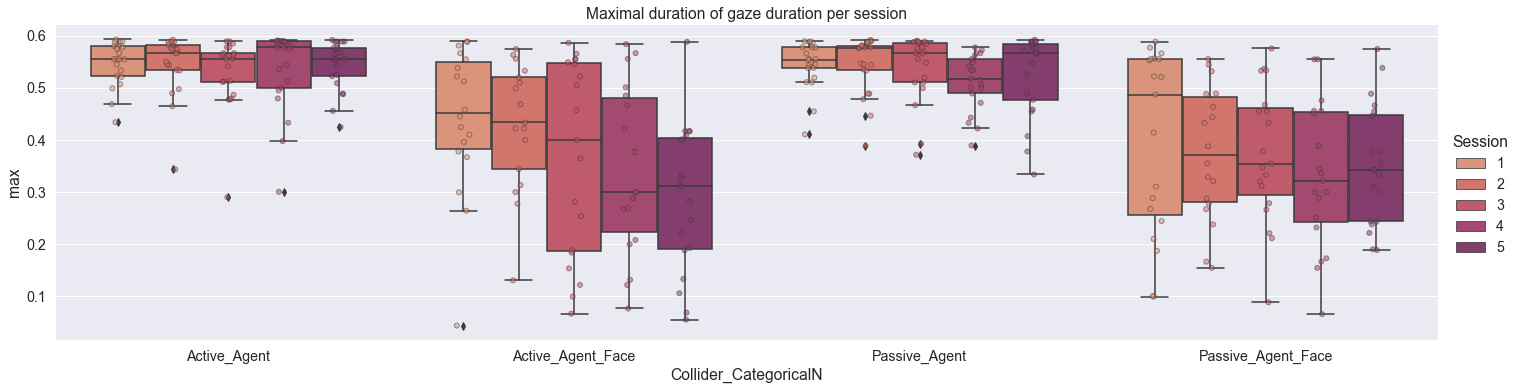

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="max", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=4, kind='box').set(title="Maximal duration of gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="max",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png')

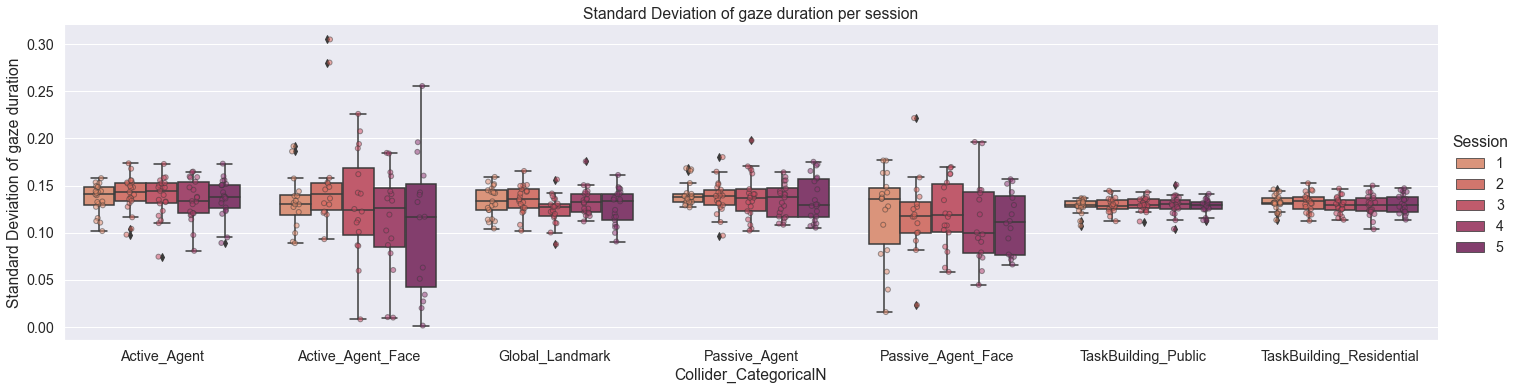

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="std", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=5, aspect=4, kind='box').set(title="Standard Deviation of gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="std",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
ax.set_ylabel("Standard Deviation of gaze duration")
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png', bbox_inches='tight')

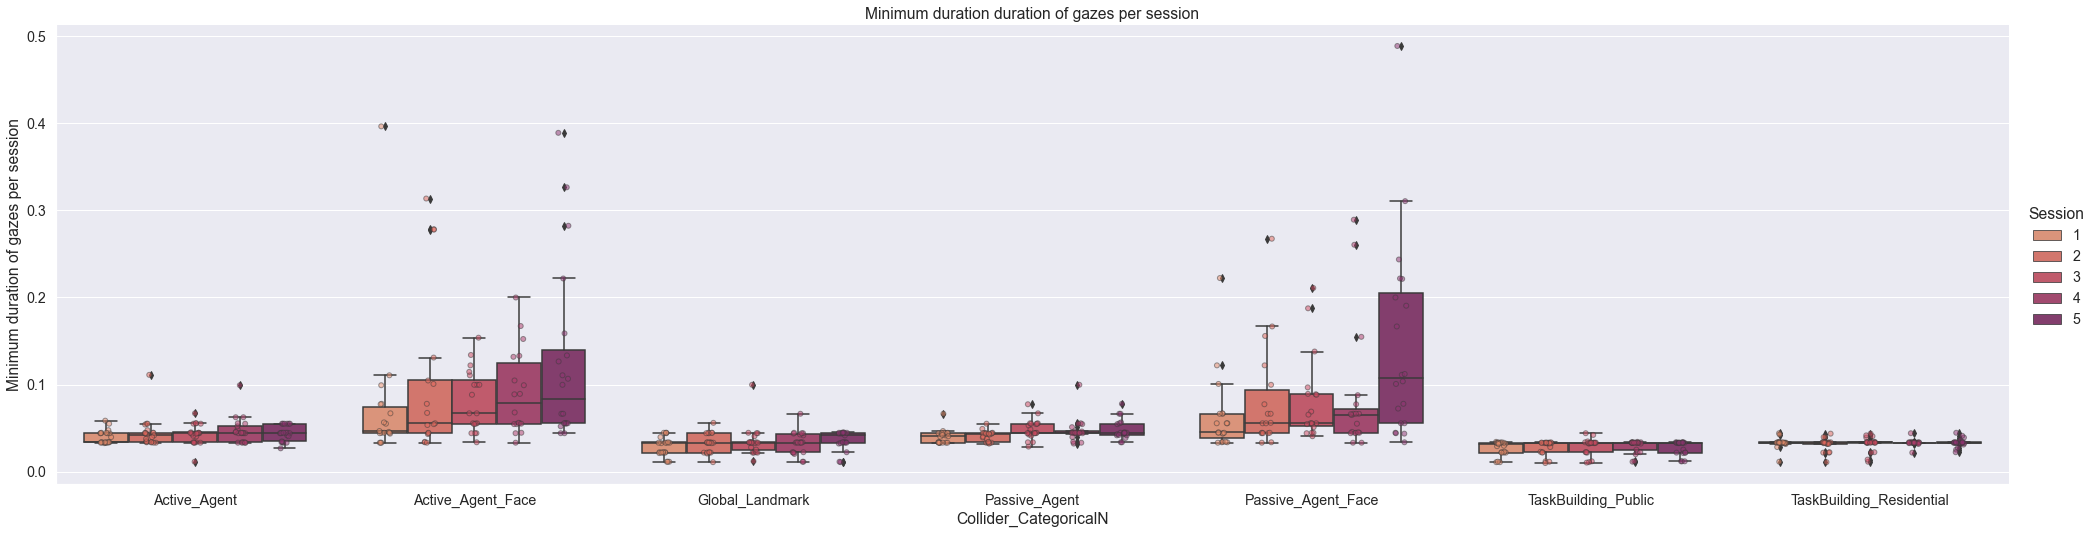

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="min", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=7, aspect=4, kind='box').set(title="Minimum duration duration of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="min",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=1)
ax.get_legend().remove()
ax.set_ylabel("Minimum duration of gazes per session")
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png', bbox_inches='tight')

In [ ]:
HumanA = pd.read_csv("/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv")

In [ ]:
HumanA["AE_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.AbsolutError - np.nanmedian(HumanA.AbsolutError))) * 1.4826
HumanA["AE_mad_z"] = abs(HumanA.AbsolutError.tolist() - np.nanmedian(HumanA.AbsolutError)) / HumanA.AE_Median_Standard_Duration.tolist()
HumanA["Outlier_AE_Length"] = np.where(HumanA["AE_mad_z"] > 3.5, "Out", "Stays")
HumanA["RT_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.RT - np.nanmedian(HumanA.RT))) * 1.4826
HumanA["RT_mad_z"] = abs(HumanA.RT.tolist() - np.nanmedian(HumanA.RT)) / HumanA.RT_Median_Standard_Duration.tolist()
HumanA["Outlier_RT_Length"] = np.where(HumanA["RT_mad_z"] > 3.5, "Out", "Stays")
HumanA_OUT = HumanA[(HumanA.Outlier_AE_Length != "Out") & (HumanA.Outlier_RT_Length != "Out")]
HumanA_OUT.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/HumanA_NoOut.cvs")

In [ ]:
data_frame.head(50)

In [ ]:
data_frame.info()

In [ ]:
data_frame.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [ ]:
One_participant.columns

In [ ]:
One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)

In [ ]:
One_participant.events.value_counts()

In [ ]:
One_participant['avg_shift'] = One_participant['avg_dist'].shift(1) != One_participant['avg_dist']

In [ ]:
data_frame.iloc[115318:115322,6:9]

In [ ]:
data_frame.info()

In [ ]:
One_participant.iloc[115521:115532,45:50]

In [ ]:
One_participant.iloc[115318:115322,6]

In [ ]:
One_participant.iloc[115322,6] - One_participant.iloc[115318,6]

In [ ]:
One_participant.iloc[115532,6] - One_participant.iloc[115521,6]

In [ ]:
One_participant.tail(200)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
df